# Model Output Notebook

### ADCIRC-SWAN Ouput
#### - Steps to follow:
  1. Import Libraries & Assign Paths
  2. Assign Tasks
  3. Save Report

### Alexandra 
 Hope you are up for a challenge
##### **Follow these steps**
 1. Initialize libraries and paths (<font color='#ff00ff'>which I went ahead and did</font>)
 2. Load in one of the fort files (netcdf)
 3. Plot the data
 
##### What I would like to see
- Map of the data (any kind (water level, velocity, waves, etc.))
- Time series of the data (any location cause I didn't show you anything about the locations in the data)
- Ideally, this should be a few hours of work.

##### Notes
- In the future we will work with this kind of data so learning the formats are important
  and this will give you a good handle on python too!
- Feel free to email me with questions. Selina could also help with python but the data is new to her too.


Z:\Users\Tyler\other\adcirc_swan\adcirc_swan

#### Init Libraries 
(these are only a few libraries. I showed you other ones last time)

In [47]:
import pandas as pd
import numpy as np
import netCDF4 as nc4 
from datetime import datetime, timedelta 
from mpl_toolkits.basemap import Basemap
import pathlib as pl
import matplotlib.pyplot as plt
files = utils.output_files(root_dir)

In [5]:
# path to the data
root = pl.Path(r'C:\Users\admin\work\example_data\fran')

### I'm just doing an example

In [8]:
# Also the model of fran started '19960829 20:00:00' or close to this 
fort = nc4.Dataset(str(root / 'fort.63.nc'), 'r') # I'm combining the path to the data with the file inside
# Hint look inside the fort variable (shown below)
df = pd.DataFrame({'wl':fort.variables['zeta'][:,371864]}) # <-- I'm grabbing the elevation values inside
fort

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 51.52.38
    grid_type: Triangular
    description: nc_inundation_v9.35_MSL   ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    agrid: Interpolated from DEM2GRD.F90
    title: storm
    institution: 2011-08-20 000000
    source: ADCIRC on Stampede
    history: Hindcast
    references: none
    comments: no comment
    host: none
    convention: no comment
    Conventions: UGRID-0.9.0
    contact: tmiesse@gmu.edu
    creation_date: 2019-03-13 13:11:55 -05:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 0.25
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 5
    ncor: 1
    ntip: 1
    nws: -12
    statim: 0.0
    reftim: 0.0
    slam0: -79.0
    sfea0: 35.0
    cori: 0.0
    ntif: 8
    nbfr: 8
    rundes: nc_inundation_v9.35_MSL   ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    runid: adc47_r131   EqTides

In [9]:
# the file and I'm extracting all of it for 
water_lvl=pd.read_csv(r'C:\Users\admin\Downloads\CO-OPS_8656483_wl.csv',sep=',')

In [10]:
url = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&'\
    'begin_date=19960829&end_date=19960909&datum=MSL&station=8656483&time_zone=GMT&units=metric&format=csv'
wl = pd.read_csv(url,sep=',')

In [11]:
wl.head()

,Date Time,Water Level,Sigma,O,F,R,L,Quality
0,1996-08-29 00:00,0.695,0.006,0,0,0,0,v
1,1996-08-29 00:06,0.698,0.002,0,0,0,0,v
2,1996-08-29 00:12,0.704,0.002,0,0,0,0,v
3,1996-08-29 00:18,0.711,0.001,0,0,0,0,v
4,1996-08-29 00:24,0.716,0.001,0,0,0,0,v


In [20]:
def timeseries(nc_data,start,freq,station,name):
    data = nc_data['zeta'][:,station]*3.28084 #106378]
    table = pd.DataFrame(data)
    date  = pd.date_range(start=start,periods=int(len(table)),freq=freq)
    table.insert(0,'Date Time',date)
    table = table.rename(columns={0:name})
    return table

In [27]:
start,freq,name = '19960829 20:00:00','6min',' Prediction'
s_noaa, e_noaa = '19960829', '19961013'
x,y='Time','Water lvl (ft) at MSL'
storm='Hurricane Fran'

In [3]:
###Surge Timeseries

In [36]:
nc_file = nc4.Dataset(files[2])
table = utils.timeseries(nc_file,'19960829 20:00:00','6min',625328,name)
data = utils.plot_timeseries(table,s_noaa,e_noaa, '865483')
title = storm +' Beaufort, NC'
layout = utils.layout(title,x,y,width=1000, height=500,yrange=[-4,8])
fig = go.Figure(data=data, layout=layout)

FileNotFoundError: [Errno 2] No such file or directory: b'N:\\TECH\\COASTAL\\NC_STORM_SURGE_MODELING_UPDATE\\SurgeModeling\\Validation\\2018Florence\\surge\\fort.63.nc'

Text(0.5, 0, 'Hours')

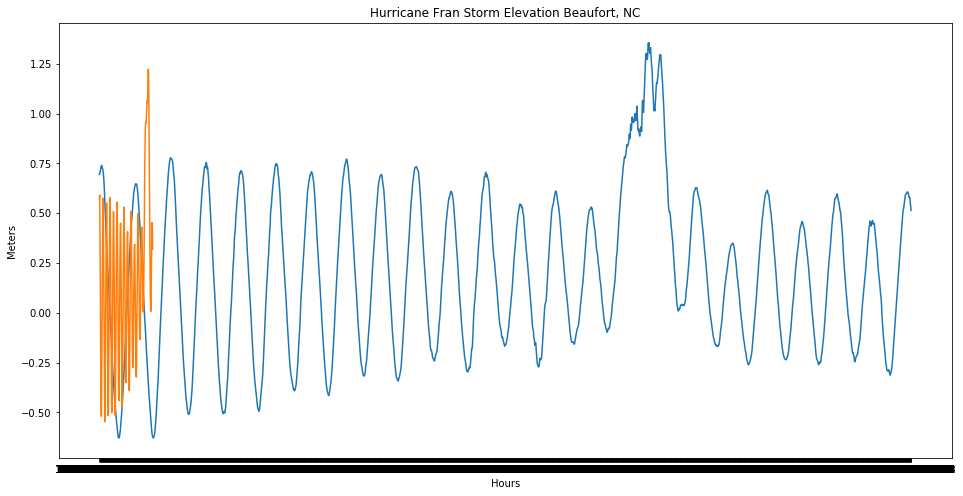

In [41]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(16,8))
plt.plot(wl['Date Time'],wl[' Water Level'])
ax.plot(df['wl'])
plt.title('Hurricane Fran Storm Elevation Beaufort, NC')
plt.ylabel('Meters')
plt.xlabel('Hours')

In [45]:
nc_file = nc4.Dataset(files[2])
table = utils.timeseries(nc_file,'19960829 20:00:00','6min',371864,name)
usgs = utils.usgs_gauges('1996-08-29','1996-10-13','0209270825',vdatum='LMSL')
usgs['water level(ft) at MSL'] = usgs['water level(ft) NAVD88']-0.15
data = utils.plot_usgs(table,usgs)
title = storm + ' Atlantic Beach Bridge, NC'
layout=utils.layout(title,x,y,xrange=[usgs['Date_time'].iloc[0],usgs['Date_time'].iloc[-1]],width=1000,height=500,yrange=[-4,8])
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)

FileNotFoundError: [Errno 2] No such file or directory: b'N:\\TECH\\COASTAL\\NC_STORM_SURGE_MODELING_UPDATE\\SurgeModeling\\Validation\\2018Florence\\surge\\fort.63.nc'

In [38]:
# Also the model of fran started '19960829 20:00:00' or close to this 
fort = nc4.Dataset(str(root / 'fort.63.nc'), 'r') # I'm combining the path to the data with the file inside
# Hint look inside the fort variable (shown below)
df = pd.DataFrame({'wl':fort.variables['zeta'][:,371864]}) # <-- I'm grabbing the elevation values inside
fort                                                       # the file and I'm extracting all of it for 
                                                           # a certain location (we'll go over this part later)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 51.52.38
    grid_type: Triangular
    description: nc_inundation_v9.35_MSL   ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    agrid: Interpolated from DEM2GRD.F90
    title: storm
    institution: 2011-08-20 000000
    source: ADCIRC on Stampede
    history: Hindcast
    references: none
    comments: no comment
    host: none
    convention: no comment
    Conventions: UGRID-0.9.0
    contact: tmiesse@gmu.edu
    creation_date: 2019-03-13 13:11:55 -05:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 0.25
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 5
    ncor: 1
    ntip: 1
    nws: -12
    statim: 0.0
    reftim: 0.0
    slam0: -79.0
    sfea0: 35.0
    cori: 0.0
    ntif: 8
    nbfr: 8
    rundes: nc_inundation_v9.35_MSL   ! 30 CHARACTER ALPHANUM RUN DESCRIPTION
    runid: adc47_r131   EqTides

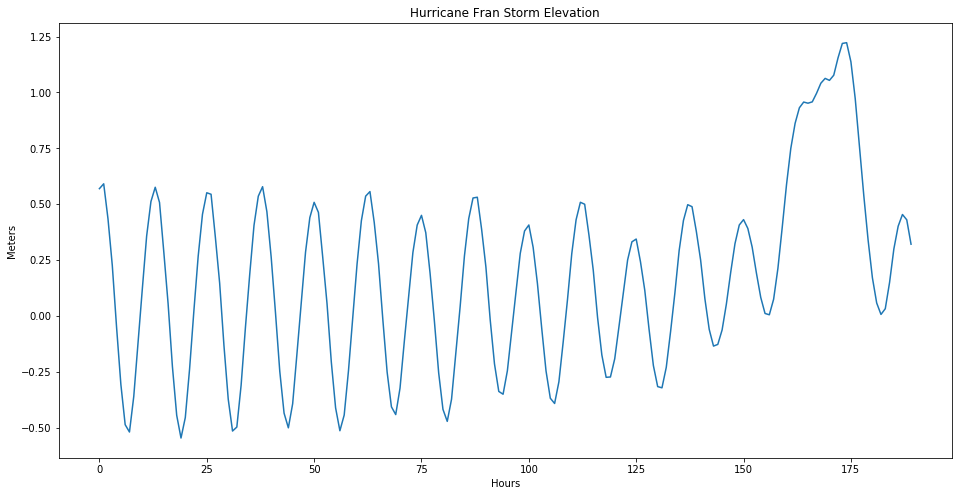

In [39]:
'19960829', '20:00:00'
fig,ax = plt.subplots(figsize=(16,8))
plt.title('Hurricane Fran Storm Elevation')
plt.ylabel('Meters')
plt.xlabel('Hours')
ax.plot(df['wl'])

In [40]:
lat1,lat2 = 33.75, 35.68
lon1,lon2 = -78.4, -76.0
fig = plt.figure(figsize=(12,10))
m = Basemap(projection='cyl',llcrnrlat=lat1,urcrnrlat=lat2,llcrnrlon=lon1,urcrnrlon=lon2,resolution='h', epsg = 4269)
plt.show()
plt.title('Hurricane Fran Water Elevation')


OSError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install basemap-data-hires`.

<Figure size 864x720 with 0 Axes>